In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv("master.csv")

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


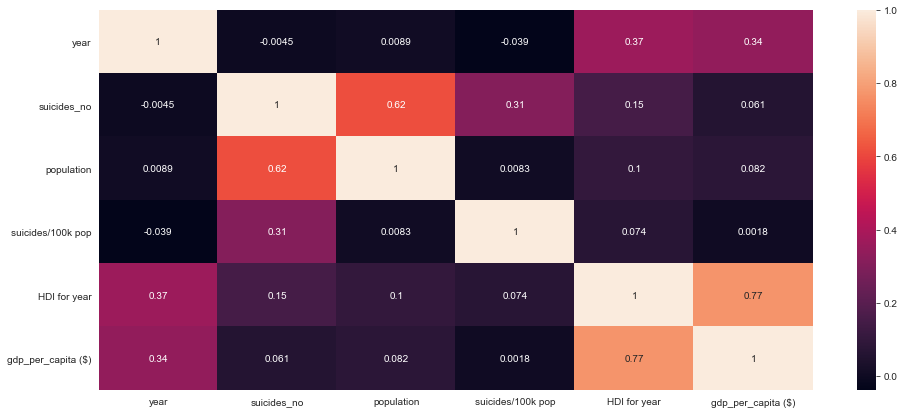

In [36]:
plt.figure(figsize=(16,7))
cor = sns.heatmap(data.corr(), annot=True)

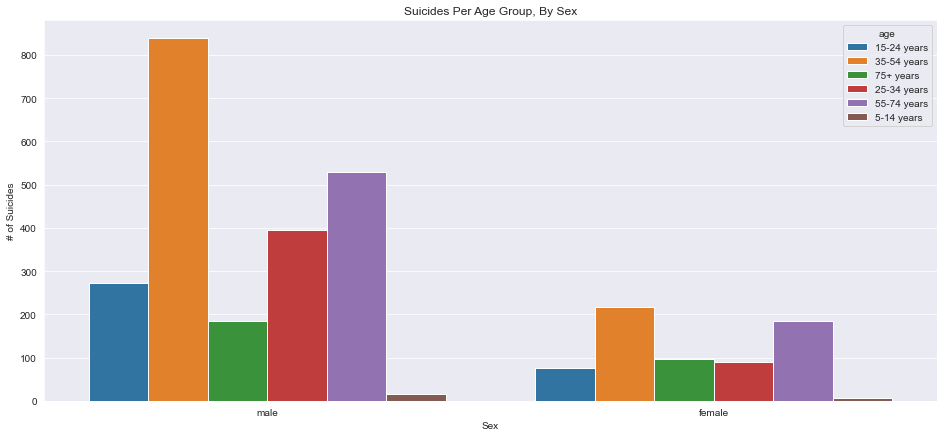

In [96]:
plt.figure(figsize=(16,7))
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = data, ci=None)
plt.title("Suicides Per Age Group, By Sex")
plt.ylabel("# of Suicides")
plt.xlabel("Sex")
plt.show()

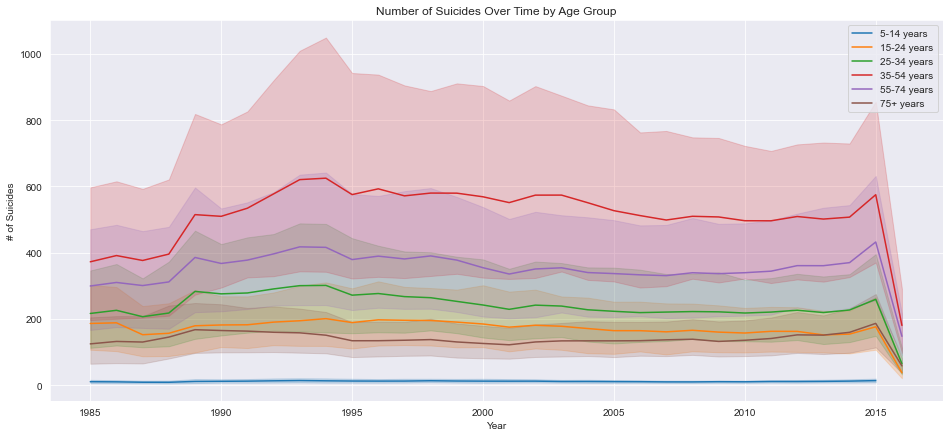

In [48]:
age_5 = data.loc[data.loc[:, 'age']=='5-14 years',:]
age_15 = data.loc[data.loc[:, 'age']=='15-24 years',:]
age_25 = data.loc[data.loc[:, 'age']=='25-34 years',:]
age_35 = data.loc[data.loc[:, 'age']=='35-54 years',:]
age_55 = data.loc[data.loc[:, 'age']=='55-74 years',:]
age_75 = data.loc[data.loc[:, 'age']=='75+ years',:]

plt.figure(figsize=(16,7))

age_5_lp = sns.lineplot(x='year', y='suicides_no', data=age_5)
age_15_lp = sns.lineplot(x='year', y='suicides_no', data=age_15)
age_25_lp = sns.lineplot(x='year', y='suicides_no', data=age_25)
age_35_lp = sns.lineplot(x='year', y='suicides_no', data=age_35)
age_55_lp = sns.lineplot(x='year', y='suicides_no', data=age_55)
age_75_lp = sns.lineplot(x='year', y='suicides_no', data=age_75)

leg = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.title("Number of Suicides Over Time by Age Group")
plt.xlabel("Year")
plt.ylabel("# of Suicides")
plt.show()

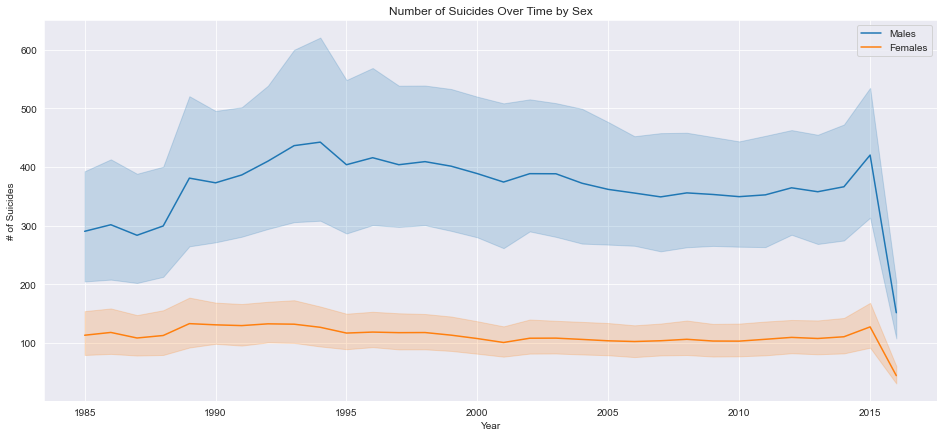

In [49]:
male_population = data.loc[data.loc[:, 'sex']=='male',:]
female_population = data.loc[data.loc[:, 'sex']=='female',:]

plt.figure(figsize=(16,7))

lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg1 = plt.legend(['Males','Females'])
plt.title("Number of Suicides Over Time by Sex")
plt.xlabel("Year")
plt.ylabel("# of Suicides")
plt.show()

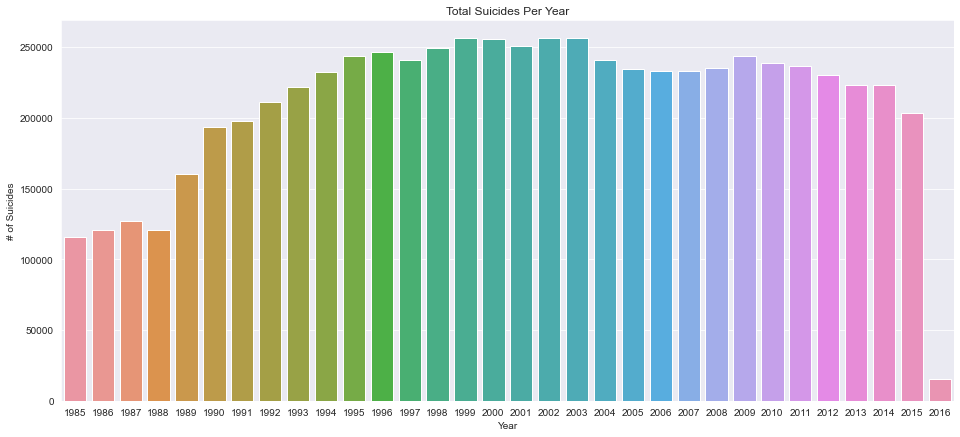

In [77]:
yearly_count = data[['year','suicides_no']].groupby("year", as_index=False)['suicides_no'].sum()
plt.figure(figsize=(16,7))
sns.barplot(x='year', y='suicides_no', data=yearly_count)
plt.title("Total Suicides Per Year")
plt.xlabel("Year")
plt.ylabel("# of Suicides")
plt.show()

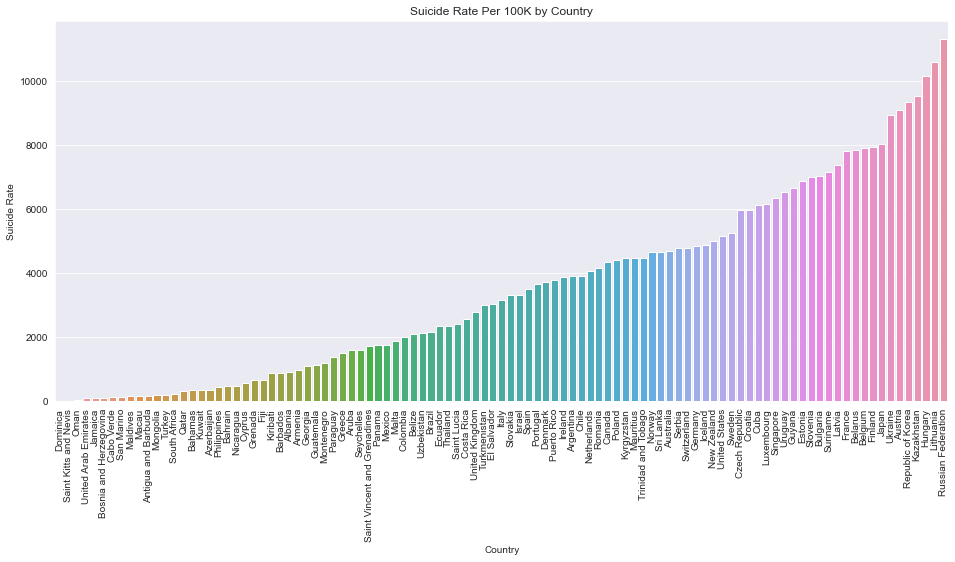

In [91]:
count_per_100k = data[["country", "suicides/100k pop"]].groupby("country", as_index=False)["suicides/100k pop"].sum()
plt.figure(figsize=(16,7))
rate_bp = sns.barplot(x='country', y='suicides/100k pop', data=count_per_100k, order=count_per_100k.sort_values('suicides/100k pop').country)
plt.title("Suicide Rate Per 100K by Country")
rate_bp.set_xticklabels(rate_bp.get_xticklabels(),rotation = 90)
plt.xlabel("Country")
plt.ylabel("Suicide Rate")
plt.show()

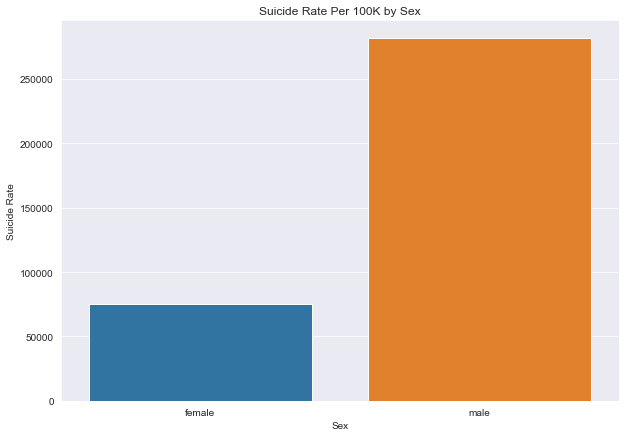

In [93]:
sex_per_100k = data[["sex", "suicides/100k pop"]].groupby("sex", as_index=False)["suicides/100k pop"].sum()
plt.figure(figsize=(10,7))
sex_rate_bp = sns.barplot(x='sex', y='suicides/100k pop', data=sex_per_100k, order=sex_per_100k.sort_values('suicides/100k pop').sex)
plt.title("Suicide Rate Per 100K by Sex")
plt.xlabel("Sex")
plt.ylabel("Suicide Rate")
plt.show()

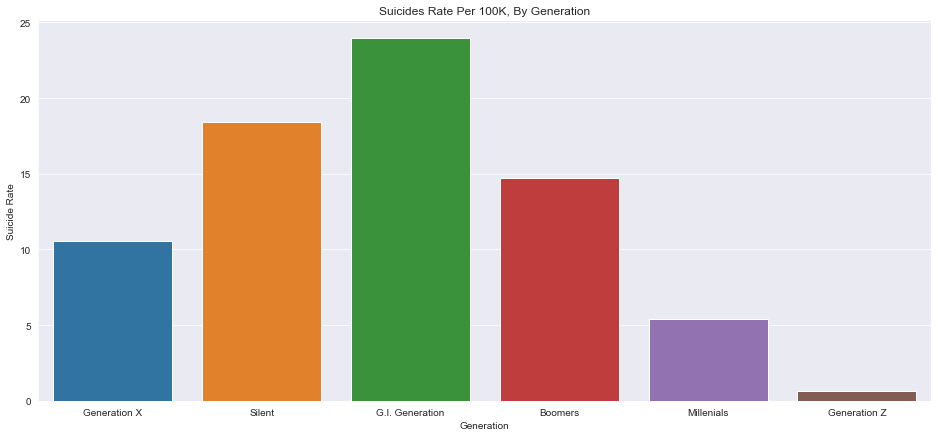

In [94]:
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'generation', y = 'suicides/100k pop',data = data, ci=None)
plt.title("Suicides Rate Per 100K, By Generation")
plt.ylabel("Suicide Rate")
plt.xlabel("Generation")
plt.show()

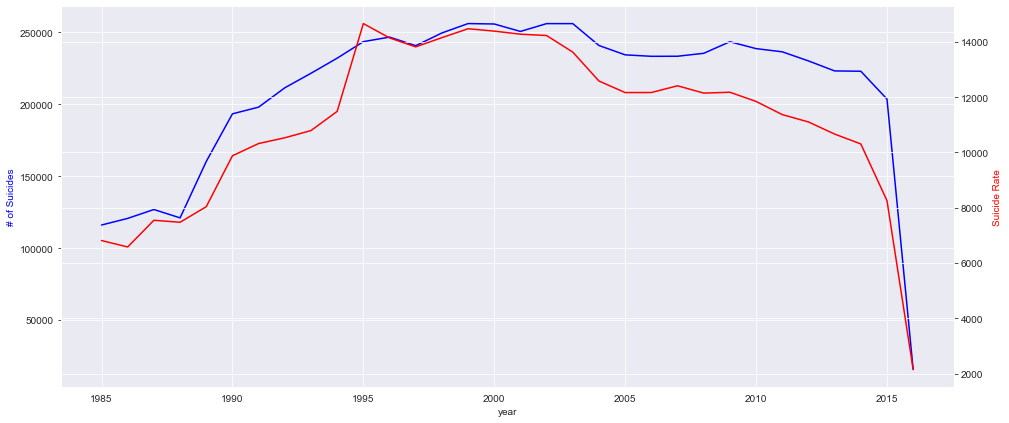

In [116]:
yearly_rate = data[['year','suicides/100k pop']].groupby("year", as_index=False)['suicides/100k pop'].sum()

plt.figure(figsize=(16,7))

ax1 = sns.lineplot(x='year', y='suicides_no', data=yearly_count, color='b')
ax2 = plt.twinx()
sns.lineplot(x='year', y='suicides/100k pop', data=yearly_rate, color='r', ax=ax2)

plt.xlabel("Year")
ax1.set_ylabel("# of Suicides", color='b')
ax2.set_ylabel('Suicide Rate', color='r')

plt.show()